In [1]:
import nltk
from nltk.stem.porter import PorterStemmer
import string
import re
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
num_regex = re.compile('^[+-]?[0-9]+\.?[0-9]*$')
from sklearn.cross_validation import train_test_split

/home/saddam/ML/venv3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
stemmer = LancasterStemmer()
def stem_tokens(tokens,stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

################### Stop Word Remove ##################

stop_words = set(stopwords.words('english'))

#punctuation list
s = list(string.punctuation)

def tokenize(string):
    tokens = nltk.word_tokenize(string)
    for index, token in enumerate(tokens):
        if token == '@' and (index+1) < len(tokens):
            tokens[index+1] = '@' + re.sub('[0-9]+.*', '', tokens[index+1])
            tokens.pop(index)
    #remove english stop word from tokens
    filtered_sentence = [w for w in tokens if not w in stop_words]
    
    #remove punctuation 
    tt = [i for i in filtered_sentence if not i in s]
    
    #Apply stemming 
    stems_word = stem_tokens(tt,stemmer)
    
    return stems_word

In [3]:
data = pd.read_excel('training_set_rel3.xls')
data.head()
df = data[data['essay_set']==2]
x = df['essay']
Y = df['domain1_score']

In [4]:
tfidf = TfidfVectorizer(tokenizer=tokenize,min_df=1,max_features=1000).fit(x)
X = tfidf.transform(x)

In [5]:
sing = X.toarray()
sing.shape

(1800, 1000)

In [6]:
U, s, V = np.linalg.svd(sing, full_matrices=False)
m = 0
for i in range(1000):
    j = float(s[i])
    if j >= 1.3:
          m =m+1
print(m)

238


In [7]:
reduce = len(s)-m
#print reduce
ua = U.shape[1]-reduce
u = U[:,:ua]
#print(u.shape)
v = V.shape[0]-reduce
v = V[:v]
####################################################
from numpy import diag
S= diag(s[:m])
S.shape

(238, 238)

In [8]:
u = np.matrix(u)
s = np.matrix(S)
v = np.matrix(v)

In [9]:
svd_matrix = u*s*v

In [10]:
svd_matrix.shape

(1800, 1000)

In [11]:
from scipy import sparse
full_svd = sparse.csc_matrix(svd_matrix)

In [12]:
train_x,test_x,train_y,test_y= train_test_split(full_svd,Y,random_state=0,test_size=0.1)

In [13]:
from sklearn import svm
model = svm.SVC(C=0.7,gamma=1)
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.65555555555555556

In [14]:
svm_predicted = model.predict(test_x)

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error,median_absolute_error,r2_score,explained_variance_score


In [16]:
print('SGDregressor mean_squared_error :%f' % mean_squared_error(test_y,svm_predicted))

SGDregressor mean_squared_error :0.444444


In [17]:
#Naive Bays
from sklearn.naive_bayes import BernoulliNB
mlb=BernoulliNB(alpha=5)

In [18]:
mlb.fit(train_x,train_y)
mlb.score(test_x,test_y)

0.6333333333333333

In [19]:
bnb_predicted = mlb.predict(test_x)

In [20]:
print('Naive Bays mean_squared_error :%f' % mean_squared_error(test_y,bnb_predicted))

Naive Bays mean_squared_error :0.450000


In [21]:
#Knearest neighbour
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knc = KNeighborsClassifier(n_neighbors=10)

In [23]:
knc.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [24]:
knc.score(test_x,test_y)

0.49444444444444446

In [25]:
knc_predicted = knc.predict(test_x)

In [26]:
print('KNC mean_squared_error :%f' % mean_squared_error(test_y,knc_predicted))

KNC mean_squared_error :0.727778


In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=40, random_state=0,max_leaf_nodes=None,min_samples_split=40)


In [28]:
rfr.fit(train_x,train_y)
rfr.score(test_x,test_y)

0.31443224866375269

In [29]:
rfr_predicted = rfr.predict(test_x)

In [30]:
pd.DataFrame({'Actual':test_y.tolist(),'Predicted':rfr_predicted})

,Actual,Predicted
0,3.0,3.222484
1,5.0,3.612401
2,3.0,3.334120
3,4.0,3.745250
4,4.0,4.040482
5,4.0,3.495385
6,4.0,3.405315
7,3.0,3.508833
8,4.0,3.204099
9,3.0,3.043552


In [31]:
print('rfr mean_squared_error :%f' % mean_squared_error(test_y,rfr_predicted))

rfr mean_squared_error :0.426575


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=40)

In [33]:
clf.fit(train_x,train_y)
clf.score(test_x,test_y)

0.5444444444444444

In [34]:
clf_predicted = clf.predict(test_x)

In [35]:
print('rfr mean_squared_error :%f' % mean_squared_error(test_y,clf_predicted))

rfr mean_squared_error :0.600000


In [36]:
pd.DataFrame({'Actual':test_y.tolist(),'Predicted':clf_predicted})

,Actual,Predicted
0,3.0,4.0
1,5.0,4.0
2,3.0,4.0
3,4.0,3.0
4,4.0,4.0
5,4.0,4.0
6,4.0,3.0
7,3.0,4.0
8,4.0,3.0
9,3.0,3.0


In [37]:
from sklearn.linear_model import SGDRegressor
sgmodel = SGDRegressor(alpha=0.0001,max_iter=1000)
sgmodel.fit(train_x,train_y)
sgmodel.score(test_x,test_y)

0.47605868576737054

In [38]:
print('SGDregressor mean_squared_error :%f' % mean_squared_error(test_y,sgmodel.predict(test_x)))


SGDregressor mean_squared_error :0.326008


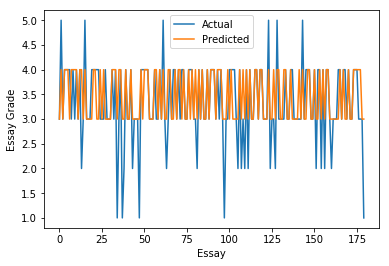

In [39]:
import matplotlib.pyplot as plt

plt.plot(test_y.tolist(),'C0', label='Actual')
plt.plot(svm_predicted.tolist(),'C1',label='Predicted')
plt.legend()
plt.ylabel('Essay Grade')
plt.xlabel('Essay') 
plt.show()

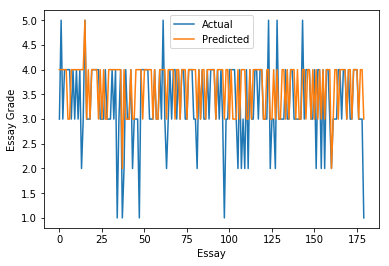

In [40]:
import matplotlib.pyplot as plt

plt.plot(test_y.tolist(),'C0', label='Actual')
plt.plot(knc.predict(test_x).tolist(),'C1',label='Predicted')
plt.legend()
plt.ylabel('Essay Grade')
plt.xlabel('Essay') 
plt.show()

In [41]:
pd.DataFrame({'Actual':test_y.tolist(),'Predicted':knc_predicted})

,Actual,Predicted
0,3.0,4.0
1,5.0,4.0
2,3.0,4.0
3,4.0,4.0
4,4.0,4.0
5,4.0,3.0
6,4.0,3.0
7,3.0,4.0
8,4.0,4.0
9,3.0,4.0


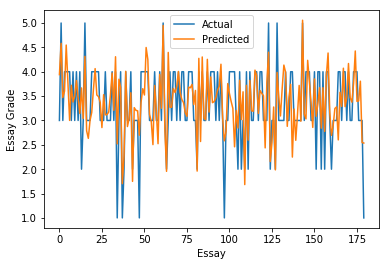

In [42]:
import matplotlib.pyplot as plt

plt.plot(test_y.tolist(),'C0', label='Actual')
plt.plot(sgmodel.predict(test_x).tolist(),'C1',label='Predicted')
plt.legend()
plt.ylabel('Essay Grade')
plt.xlabel('Essay') 
plt.show()

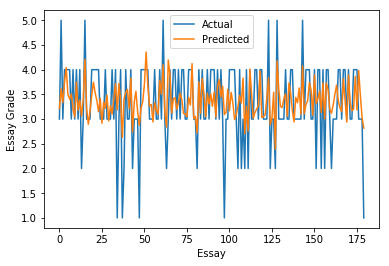

In [43]:

plt.plot(test_y.tolist(),'C0', label='Actual')
plt.plot(rfr_predicted.tolist(),'C1',label='Predicted')
plt.legend()
plt.ylabel('Essay Grade')
plt.xlabel('Essay') 
plt.show()

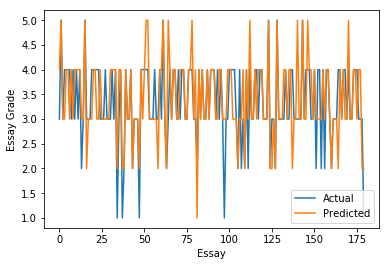

In [44]:

plt.plot(test_y.tolist(),'C0', label='Actual')
plt.plot(bnb_predicted.tolist(),'C1',label='Predicted')
plt.legend()
plt.ylabel('Essay Grade')
plt.xlabel('Essay') 
plt.show()

In [45]:
pd.DataFrame({'Actual':test_y.tolist(),'Predicted':bnb_predicted})

,Actual,Predicted
0,3.0,4.0
1,5.0,5.0
2,3.0,3.0
3,4.0,3.0
4,4.0,4.0
5,4.0,4.0
6,4.0,3.0
7,3.0,4.0
8,4.0,3.0
9,3.0,4.0


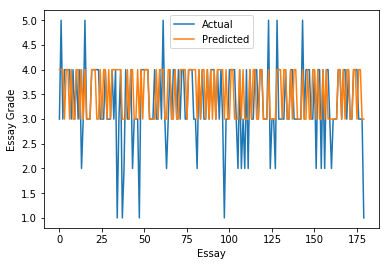

In [46]:

plt.plot(test_y.tolist(),'C0', label='Actual')
plt.plot(clf_predicted.tolist(),'C1',label='Predicted')
plt.legend()
plt.ylabel('Essay Grade')
plt.xlabel('Essay') 
plt.show()

In [47]:
pd.DataFrame({'Actual':test_y.tolist(),'Predicted':clf_predicted})

,Actual,Predicted
0,3.0,4.0
1,5.0,4.0
2,3.0,4.0
3,4.0,3.0
4,4.0,4.0
5,4.0,4.0
6,4.0,3.0
7,3.0,4.0
8,4.0,3.0
9,3.0,3.0


In [48]:
actual_ac=test_y.tolist()
kk=0.0000
def min_max(actual,predict):
    actual_ac = actual
    final_ac = predict
    kk=0.000
    for jj in range(180):
        kk = kk + float(float(min(actual_ac[jj],final_ac[jj]))/float(max(actual_ac[jj],final_ac[jj])))
    kk = float(kk/180.0)
    return kk


In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error,median_absolute_error,r2_score,explained_variance_score


In [50]:
print('SGDregressor mean_squared_log_error :%f' % mean_squared_log_error(test_y,sgmodel.predict(test_x)))
print( 'SGDregressor mean_absolute_error :%f'%mean_absolute_error(test_y,sgmodel.predict(test_x)))
print( 'SGDregressor median_absolute_error :%f' % median_absolute_error(test_y,sgmodel.predict(test_x)))
print('SGDregressor mean_squared_error :%f' % mean_squared_error(test_y,sgmodel.predict(test_x)))
print( 'SGDregressor r2_score :%f' % r2_score(test_y,sgmodel.predict(test_x)))
print( 'SGDregressor variance :%f' % explained_variance_score(test_y,sgmodel.predict(test_x)))
print('SGDregressor min_max accuracy :%f' % min_max(actual_ac,sgmodel.predict(test_x)))

#rfr_predicted

SGDregressor mean_squared_log_error :0.023012
SGDregressor mean_absolute_error :0.438365
SGDregressor median_absolute_error :0.363534
SGDregressor mean_squared_error :0.326008
SGDregressor r2_score :0.476059
SGDregressor variance :0.479028
SGDregressor min_max accuracy :0.874302


In [51]:
print('SGDregressor mean_squared_log_error :%f' % mean_squared_log_error(test_y,rfr_predicted))
print( 'SGDregressor mean_absolute_error :%f'%mean_absolute_error(test_y,rfr_predicted))
print( 'SGDregressor median_absolute_error :%f' % median_absolute_error(test_y,rfr_predicted))
print('SGDregressor mean_squared_error :%f' % mean_squared_error(test_y,rfr_predicted))
print( 'SGDregressor r2_score :%f' % r2_score(test_y,rfr_predicted))
print( 'SGDregressor variance :%f' % explained_variance_score(test_y,rfr_predicted))
print('SGDregressor min_max accuracy :%f' % min_max(actual_ac,rfr_predicted))

#rfr_predicted

SGDregressor mean_squared_log_error :0.030639
SGDregressor mean_absolute_error :0.513528
SGDregressor median_absolute_error :0.473581
SGDregressor mean_squared_error :0.426575
SGDregressor r2_score :0.314432
SGDregressor variance :0.316639
SGDregressor min_max accuracy :0.856876


In [52]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_score

In [54]:
print('SVM %f'%metrics.precision_score(test_y,svm_predicted,average='macro'))
print('Random forest classifier %f'%metrics.precision_score(test_y,clf_predicted,average='macro'))
print('Nive bays %f'%metrics.precision_score(test_y,bnb_predicted,average='macro'))
print('Knearest %f'%metrics.precision_score(test_y,knc_predicted,average='macro'))


#average_precision_score(test_y,knc_predicted)

SVM 0.263116
Random forest classifier 0.217787
Nive bays 0.447211
Knearest 0.501014


/home/saddam/ML/venv3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
from sklearn.metrics import recall_score,fbeta_scoreta_scoreta_scoreta_scoreta_scoreta_scoreta_scoreta_scoreta_scoreta_scoreta_scoreta_score

In [64]:
print('SVM %f'%metrics.recall_score(test_y,svm_predicted,average='macro'))
print('Random forest classifier %f'%metrics.recall_score(test_y,clf_predicted,average='macro'))
print('Nive bays %f'%metrics.recall_score(test_y,bnb_predicted,average='macro'))
print('Knearest %f'%metrics.recall_score(test_y,knc_predicted,average='macro'))
 

SVM 0.306511
Random forest classifier 0.255505
Nive bays 0.565757
Knearest 0.276635


In [67]:
print('SVM %f'%metrics.fbeta_score(test_y,svm_predicted,beta,average='macro'))
print('Random forest classifier %f'%metrics.recall_score(test_y,clf_predicted,average='macro'))
print('Nive bays %f'%metrics.recall_score(test_y,bnb_predicted,average='macro'))
print('Knearest %f'%metrics.recall_score(test_y,knc_predicted,average='macro'))

NameError: name 'beta' is not defined